In [1]:
import sklearn as sk
from pyDeepInsight import ImageTransformer, LogScaler
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from sklearn.model_selection import train_test_split

/home/nalex/anaconda3/lib/python3.8/site-packages/torchvision/io/image.py:11: UserWarning: Failed to load image Python extension: libc10_cuda.so: cannot open shared object file: No such file or directory
  warn(f"Failed to load image Python extension: {e}")


In [2]:
from pyDeepInsight import ImageTransformer, LogScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.manifold import TSNE
#from sklearn.manifold import PCA
import pandas as pd
import numpy as np

In [3]:
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
from keras import backend as K
import tensorflow as tf

In [5]:
# data = pd.read_csv('../cmu-syn-cleaned-for-t2i/cmu-syn-cleaned-for-t2i.csv')

In [22]:
data2 = pd.read_csv('../CMU_SynTraffic_2022/CMU_SynTraffic_2022.csv')

In [26]:
data2['Application Type'].unique()

array(['audio-streaming', 'browsing', 'chat', 'file-transfer', 'email',
       'p2p', 'video-streaming', 'voip'], dtype=object)

In [4]:
data = pd.read_csv('../cmu-syn-cleaned-for-t2i/cmu-syn-cleaned-for-t2i.csv', low_memory=False, header=0, index_col='Index')

In [9]:
#data['Application Type'].value_counts

In [20]:
Y = data['Application Type']
data = data.loc[:,data.columns != 'Application Type']

In [7]:
len(data.columns)

65

In [5]:
data = data.select_dtypes(exclude=object)

In [11]:
data.columns

Index(['Protocol', 'Flow Duration', 'Total Fwd Packet', 'Total Bwd packets',
       'Total Length of Fwd Packet', 'Total Length of Bwd Packet',
       'Fwd Packet Length Max', 'Fwd Packet Length Min',
       'Fwd Packet Length Mean', 'Fwd Packet Length Std',
       'Bwd Packet Length Max', 'Bwd Packet Length Min',
       'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s',
       'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max',
       'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std',
       'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean',
       'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags',
       'Fwd Header Length', 'Bwd Header Length', 'Fwd Packets/s',
       'Bwd Packets/s', 'Packet Length Min', 'Packet Length Max',
       'Packet Length Mean', 'Packet Length Std', 'Packet Length Variance',
       'FIN Flag Count', 'SYN Flag Count', 'RST Flag Count', 'PSH Flag Count',
       'ACK Flag Count', 'Down/Up Ratio

In [6]:
distance_metric = 'cosine'
reducer = TSNE(
    n_components=2,
    metric=distance_metric,
    square_distances=True,
    n_jobs=-1
)

In [7]:
ln=LogScaler()
data = ln.fit_transform(data)
#X_train_norm = ln.fit_transform(X_train)
#X_test_norm = ln.transform(X_test)

In [8]:
pixel_size = (28,28)
it = ImageTransformer(
    feature_extractor=reducer, 
    pixels=pixel_size)

In [9]:
data.loc[:, (data != 0).any(axis=0)]

,Unnamed: 0,Protocol,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,...,FWD Init Win Bytes,Bwd Init Win Bytes,Fwd Act Data Pkts,Fwd Seg Size Min,Idle Mean,Idle Std,Idle Max,Idle Min,Zero1,Zero2
Index,,,,,,,,,,,,,,,,,,,,,
0-audio-streaming,0.000000,0.673239,0.999724,0.570707,0.673283,0.607776,0.796393,0.604631,0.000000,0.641171,...,1.000000,1.000000,0.439765,0.799788,0.999928,0.503986,0.999928,0.999928,NaN,NaN
1-audio-streaming,0.046865,0.673239,0.999890,0.595218,0.693117,0.641639,0.805962,0.699462,0.000000,0.687770,...,1.000000,1.000000,0.488070,0.799788,0.999928,0.502991,0.999928,0.999928,NaN,NaN
2-audio-streaming,0.074280,0.673239,0.999509,0.560772,0.655738,0.599515,0.785477,0.604631,0.000000,0.635964,...,1.000000,1.000000,0.426434,0.799788,0.999928,0.500815,0.999928,0.999928,NaN,NaN
3-audio-streaming,0.093730,0.673239,0.726444,0.119060,0.097137,0.335375,0.340996,0.604631,0.000000,0.752024,...,0.958106,1.000000,0.000000,0.799788,0.999928,0.380895,0.999928,0.999928,NaN,NaN
4-audio-streaming,0.108818,0.673239,0.640409,0.119060,0.097137,0.337486,0.343143,0.608437,0.000000,0.757331,...,0.958106,1.000000,0.000000,0.799788,0.999928,0.334524,0.999928,0.999928,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550462-file-transfer,1.000000,0.673239,0.208095,0.094353,0.000000,0.226958,0.000000,0.402162,0.581202,0.563373,...,0.526642,0.526642,0.000000,0.910440,0.000000,0.000000,0.000000,0.000000,NaN,NaN
550463-voip,1.000000,1.000000,0.694851,0.119060,0.000000,0.202678,0.000000,0.300974,0.434966,0.420492,...,0.000000,0.000000,0.059559,0.577205,0.000000,0.000000,0.000000,0.000000,NaN,NaN
550464-audio-streaming,1.000000,1.000000,0.352152,0.094353,0.061286,0.187754,0.282898,0.338493,0.489188,0.472910,...,0.000000,0.000000,0.000000,0.577205,0.000000,0.000000,0.000000,0.000000,NaN,NaN


In [10]:
data = data.dropna(axis=1, how = 'all')

In [11]:
data.dropna(inplace=True)
#data.dropna(how='all',axis=0, inplace=True)


In [12]:
data.isna().sum()


0

it.fit does not work with na, but might lose valuable data?

/home/nalex/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/nalex/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


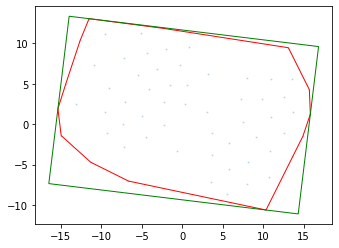

In [13]:
it.fit(data, plot=True)
image_data = it.transform(data)

#data.dropna(inplace=True)
#X_train_img = it.transform(X_train_norm)
#X_test_img = it.transform(X_test_norm)

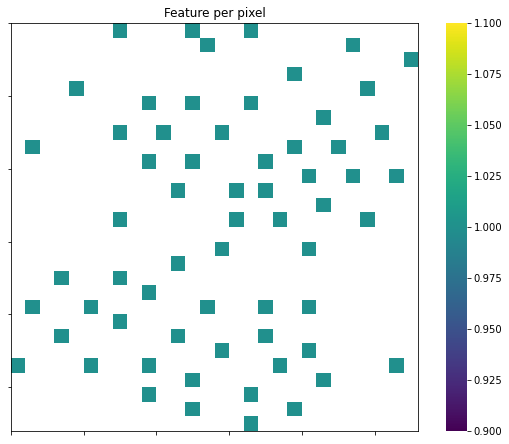

In [14]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

fdm = it.feature_density_matrix()
fdm[fdm == 0] = np.nan

plt.figure(figsize=(10, 7.5))

ax = sns.heatmap(fdm, cmap="viridis", linewidths=0., 
                 linecolor="lightgrey", square=True)
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
ax.yaxis.set_major_locator(ticker.MultipleLocator(5))
for _, spine in ax.spines.items():
    spine.set_visible(True)
_ = plt.title("Feature per pixel")

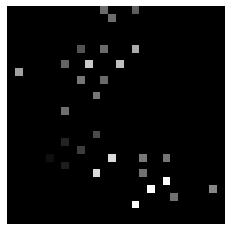

In [15]:
fig, ax = plt.subplots()
ax.axis('off')
ax.imshow(image_data[70000])

In [129]:
len(data)

609480

In [16]:
from PIL import Image
import PIL as PIL
import torch

import torchvision.transforms as T



In [57]:
#transform = T.ToPILImage()
#tensor = torch.rand(3,32,32)


In [58]:
#image_data[0] = np.asarray(image_data[0]).astype(np.int).reshape(32,32, 3)


/tmp/ipykernel_1088/3874295071.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  image_data[0] = np.asarray(image_data[0]).astype(np.int).reshape(32,32, 3)


In [18]:
def tensor_to_image(tensor):
    tensor = tensor*255
    tensor = np.array(tensor, dtype=np.uint8)
    if np.ndim(tensor)>3:
        assert tensor.shape[0] == 1
        tensor = tensor[0]
    return PIL.Image.fromarray(tensor)

In [89]:
img = tensor_to_image(image_data[600000])

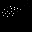

In [90]:
img

In [28]:
data.index[0]

'0-DNS'

In [21]:
data.index.value_counts

<bound method IndexOpsMixin.value_counts of Index(['0-audio-streaming', '1-audio-streaming', '2-audio-streaming',
       '3-audio-streaming', '4-audio-streaming', '5-audio-streaming',
       '6-audio-streaming', '7-audio-streaming', '8-audio-streaming',
       '9-audio-streaming',
       ...
       '550457-chat', '550458-audio-streaming', '550459-audio-streaming',
       '550460-audio-streaming', '550461-audio-streaming',
       '550462-file-transfer', '550463-voip', '550464-audio-streaming',
       '550465-audio-streaming', '550466-file-transfer'],
      dtype='object', name='Index', length=550467)>

In [19]:
image_folder = "darknet_data"
for i in range(0, len(image_data)):
    #image = Image.fromarray(image_data[i])
    image = tensor_to_image(image_data[i])
    image.save(image_folder + '/' + str(data.index[i]) + '_image.png')

In [2]:
#fig, ax = plt.subplots(1, 6, figsize=(15, 5))
#for i in range(20000,20005):
    #ax[i].imshow(data[i])
    #ax[i].title.set_text(f"Train[{i}] - class '{Y_train[i]}'")
#plt.tight_layout()

#fig.savefig('full_figure.png')

In [1]:
#data = pd.read_csv('./Darknet_experiments_updated_index.csv', low_memory=False, header=0, index_col=0)

In [1]:
# ResNet50_model = tf.keras.applications.ResNet50V2(weights='imagenet', include_top=False, input_shape=(234,230,3), classes=12)

# for layers in ResNet50_model.layers:
#     layers.trainable=True

# opt = tf.keras.optimizers.SGD(lr=0.01,momentum=0.7)
# resnet50_x = tf.keras.layers.Flatten()(ResNet50_model.output)
# resnet50_x = tf.keras.layers.Dense(256,activation='relu')(resnet50_x)
# resnet50_x = tf.keras.layers.Dense(12,activation='softmax')(resnet50_x)
# resnet50_x_final_model = tf.keras.Model(inputs=ResNet50_model.input, outputs=resnet50_x)
# resnet50_x_final_model.compile(loss = 'categorical_crossentropy', optimizer= opt, metrics=['acc',f1_m,precision_m, recall_m])
# number_of_epochs = 60
# resnet_filepath = '/mnt/sda1/image_results/resnet50'+'-saved-model-{epoch:02d}-val_acc-{val_acc:.2f}.hdf5'
# resnet_checkpoint = tf.keras.callbacks.ModelCheckpoint(resnet_filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
# resnet_early_stopping = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)
# reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.05, patience=5, min_lr=0.000002)
# tb_callback = tf.keras.callbacks.TensorBoard('./tb_logs', update_freq=1)
# callbacklist = [resnet_checkpoint,resnet_early_stopping,reduce_lr,tb_callback]
# resnet50_history = resnet50_x_final_model.fit(train_generator, epochs = number_of_epochs ,validation_data = validation_generator,callbacks=callbacklist,verbose=1)
